In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import nltk
import string
from nltk.corpus import stopwords
import re


nltk.download('stopwords')
stop_words= set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("amazon.csv")

In [3]:
print(df.head())
print(df.info())



                                          reviewText  Positive
0  This is a one of the best apps acording to a b...         1
1  This is a pretty good version of the game for ...         1
2  this is a really cool game. there are a bunch ...         1
3  This is a silly game and can be frustrating, b...         1
4  This is a terrific game on any pad. Hrs of fun...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None


In [4]:
print(df.isnull().sum())

reviewText    0
Positive      0
dtype: int64


In [5]:
df = df.dropna(subset=['reviewText'])

df['Positive'].fillna(df['Positive'].mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5244\2277352074.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Positive'].fillna(df['Positive'].mode()[0], inplace=True)


In [6]:
def preprocess_text(text):
    
    text = text.lower()
    
    text = text.translate(str.maketrans('','', string.punctuation)) # Remove punctuation
    
    text = re.sub(r'\d+', '', text)  # Remove numbers and special characters
    
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    text = ' '.join(tokens)
    
    return text

df ['reviewText'] = df['reviewText'].apply(preprocess_text)



In [7]:
X = df['reviewText']
y = df['Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

In [9]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_tfidf, y_train)
y_pred_rf = rf_clf.predict(X_test_tfidf)

In [10]:
svm_clf = SVC()
svm_clf.fit(X_train_tfidf, y_train)
y_pred_svm = svm_clf.predict(X_test_tfidf)

In [11]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_clf.predict(X_test_tfidf)

In [12]:
def evaluate_model (y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()

Logistic Regression:
Accuracy: 0.8925
Precision: 0.8999
Recall: 0.9661
F1 Score: 0.9318
Confusion Matrix:


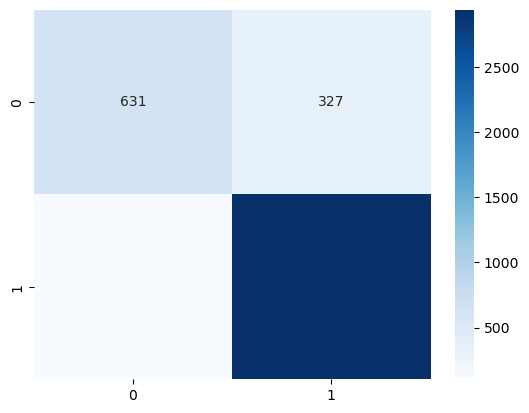

In [13]:
print("Logistic Regression:")
evaluate_model(y_test, y_pred_log_reg)

Random Forest:
Accuracy: 0.8745
Precision: 0.8828
Recall: 0.9629
F1 Score: 0.9211
Confusion Matrix:


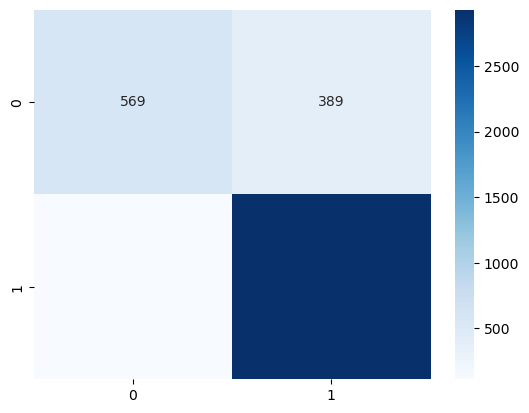

In [14]:
print("Random Forest:")
evaluate_model(y_test, y_pred_rf)

Support Vector Machine:
Accuracy: 0.8932
Precision: 0.9027
Recall: 0.9635
F1 Score: 0.9321
Confusion Matrix:


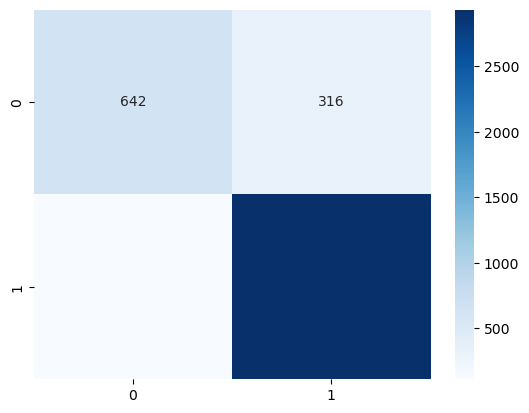

In [15]:
print("Support Vector Machine:")
evaluate_model(y_test, y_pred_svm)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8752
Precision: 0.8819
Recall: 0.9652
F1 Score: 0.9217
Confusion Matrix:


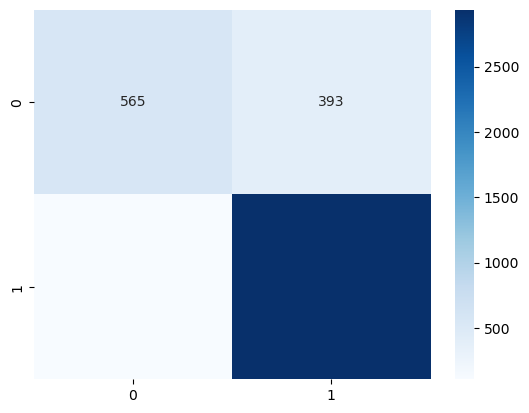

In [17]:
param_grid = {
    'n_estimators' : [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_best_rf)

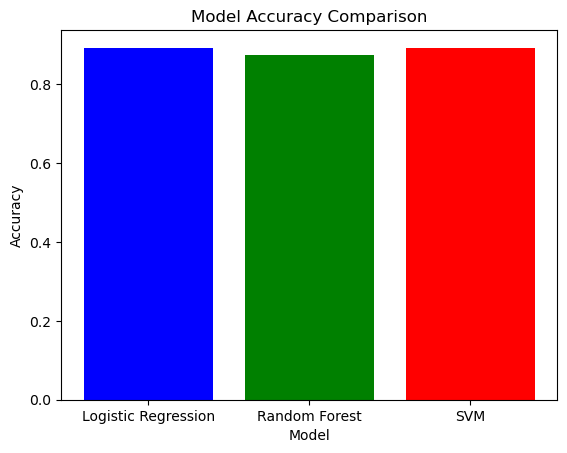

In [18]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()